In [36]:
#Imports

import sys
import os
import re
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
demux_genomes = pd.read_csv('/DATA_RAID2/vtracann/shared/db/isolates/global/unzipped/pd_demux_collection_distance.tsv',sep='\t', index_col=0)
working_dir = '/DATA_RAID2/vtracann/shared/db/isolates/global/unzipped/'
genomes = demux_genomes.index
print (genomes)
genomes_path = ['{}{}'.format(working_dir, x) for x in genomes]
print (genomes_path[0])


Index(['GCA_000179935.1_ASM17993v1_genomic.fna',
       'GCA_000179955.1_ASM17995v1_genomic.fna',
       'GCA_000179975.1_ASM17997v1_genomic.fna',
       'GCA_000179995.1_ASM17999v1_genomic.fna',
       'GCA_001623385.2_ASM162338v2_genomic.fna',
       'GCA_003160765.1_ASM316076v1_genomic.fna',
       'GCA_003367665.1_ASM336766v1_genomic.fna',
       'GCA_004143925.1_ASM414392v1_genomic.fna',
       'GCA_004143935.1_ASM414393v1_genomic.fna',
       'GCA_004143945.1_ASM414394v1_genomic.fna',
       ...
       'S39.contigs.fasta', 'S52.contigs.fasta', 'S55.contigs.fasta',
       'S64.contigs.fasta', 'S65.contigs.fasta', 'S6.contigs.fasta',
       'S71.contigs.fasta', 'S72.contigs.fasta', 'S7.contigs.fasta',
       'Si1.contigs.fasta'],
      dtype='object', length=1095)
/DATA_RAID2/vtracann/shared/db/isolates/global/unzipped/GCA_000179935.1_ASM17993v1_genomic.fna


In [38]:
#parse and edit the quast report to make it easy to load in pandas 
quast_report = open('/DATA_RAID2/vtracann/shared/db/isolates/global/unzipped/quast/report.txt').read()
quast_report = quast_report.split('\n')[:-1]

#positions where the index (to be made into columns) ends when splitting on blank
edit_pos = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 1, 1, 1, 1, 1, 5]
columns = []

for x in range(3, len(quast_report)):
    #Regular expression, splits on blank space and matches multiple blank spaces in a row. This will be the columns of the df
    col_id = '_'.join(re.split(' +', quast_report[x])[:edit_pos[x-3]])
    columns.append(col_id)
    
#columns in the report are assemblies and we use them as index
I = open('/DATA_RAID2/vtracann/shared/db/isolates/global/unzipped/quast/report.txt').read().split('\n')[2]
I = re.split(' +', I)[1:-1]

#create empty df to fill
report_df = pd.DataFrame(0, index = I, columns = columns)

#fill the df
for x in range(3, len(quast_report)):
    col_id = '_'.join(re.split(' +', quast_report[x])[:edit_pos[x-3]])
    values = re.split(' +', quast_report[x])[edit_pos[x-3]:-1]
    print (col_id)
    print (values)
    if '.' in values[0]:        
        values = [float(x) for x in values]
    else:
        report_df.loc[I, col_id] = values

#store on disk
report_df.to_csv('/DATA_RAID2/vtracann/shared/db/isolates/global/unzipped/quast/report_edit.txt', sep='\t')


#_contigs_(>=_0_bp)
['37', '28', '24', '25', '59', '45', '21', '25', '43', '32', '95', '48', '4', '29', '48', '51', '2061', '1759', '29', '1075', '805', '2277', '127', '158', '2573', '3460', '1039', '2899', '2031', '93', '48', '937', '1796', '789', '2585', '2223', '2448', '132', '2318', '318', '1297', '1006', '3177', '1432', '902', '527', '370', '1110', '2316', '1211', '431', '682', '1393', '1334', '222', '170', '3238', '2929', '4019', '4682', '1374', '3846', '405', '243', '3481', '643', '773', '1315', '519', '558', '1557', '3516', '194', '1978', '1476', '1123', '1892', '3450', '649', '107', '1034', '168', '1308', '1377', '1511', '1311', '2060', '1412', '1966', '2018', '2521', '520', '1667', '1494', '2534', '1504', '2512', '2058', '505', '790', '229', '86', '148', '216', '2422', '979', '56', '126', '21', '72', '2657', '652', '541', '41', '72', '1485', '140', '41', '903', '770', '2045', '627', '372', '654', '1913', '3118', '80', '60', '911', '888', '1012', '1025', '908', '1208', '1008',

/tmp/ipykernel_3139542/3883026995.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['37', '28', '24', '25', '59', '45', '21', '25', '43', '32', '95', '48', '4', '29', '48', '51', '2061', '1759', '29', '1075', '805', '2277', '127', '158', '2573', '3460', '1039', '2899', '2031', '93', '48', '937', '1796', '789', '2585', '2223', '2448', '132', '2318', '318', '1297', '1006', '3177', '1432', '902', '527', '370', '1110', '2316', '1211', '431', '682', '1393', '1334', '222', '170', '3238', '2929', '4019', '4682', '1374', '3846', '405', '243', '3481', '643', '773', '1315', '519', '558', '1557', '3516', '194', '1978', '1476', '1123', '1892', '3450', '649', '107', '1034', '168', '1308', '1377', '1511', '1311', '2060', '1412', '1966', '2018', '2521', '520', '1667', '1494', '2534', '1504', '2512', '2058', '505', '790', '229', '86', '148', '216', '2422', '979', '56', '126', '21', '72', '2657', '652', '541', '41', '72', '1485

['#_contigs_(>=_0_bp)', '#_contigs_(>=_1000_bp)', '#_contigs_(>=_5000_bp)', '#_contigs_(>=_10000_bp)', '#_contigs_(>=_25000_bp)', '#_contigs_(>=_50000_bp)', 'Total_length_(>=_0_bp)', 'Total_length_(>=_1000_bp)', 'Total_length_(>=_5000_bp)', 'Total_length_(>=_10000_bp)', 'Total_length_(>=_25000_bp)', 'Total_length_(>=_50000_bp)', '#_contigs', 'Largest_contig', 'Total_length', 'GC_(%)', 'N50', 'N90', 'auN', 'L50', 'L90', "#_N's_per_100_kbp"]
                                    #_contigs_(>=_1000_bp)  \
GCA_000179935.1_ASM17993v1_genomic                      34   
GCA_000179955.1_ASM17995v1_genomic                      27   
GCA_000179975.1_ASM17997v1_genomic                      20   
GCA_000179995.1_ASM17999v1_genomic                      24   
GCA_001422265.1_Leaf90_genomic                          59   
...                                                    ...   
GCF_900164545.1_16780_8_80                              25   
GCF_902829415.1_ASM90282941v1                           33  

/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

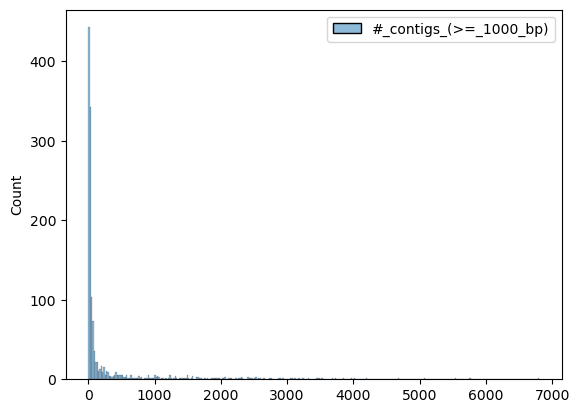

Total_length_(>=_1000_bp)
[    2494     6341    11747 ... 11214850 12069056 12945311]


/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

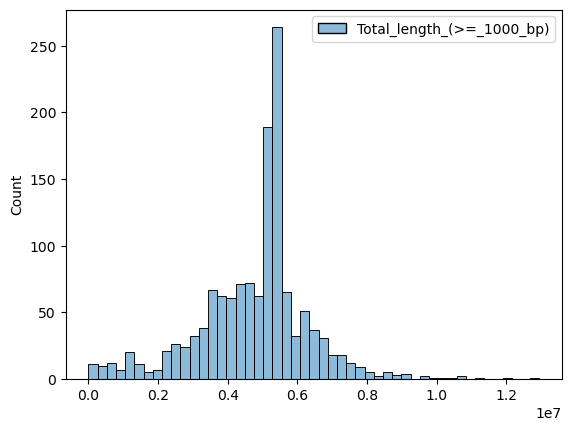

Largest_contig
[   1269    1635    2078 ... 6332373 6427864 6500345]


/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

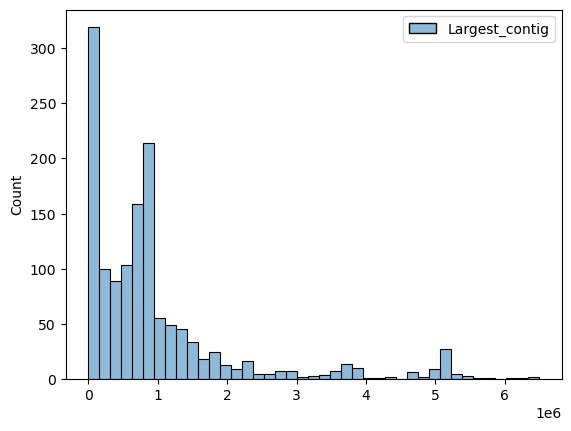

N50
[    580     688     739 ... 6332373 6427864 6500345]


/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

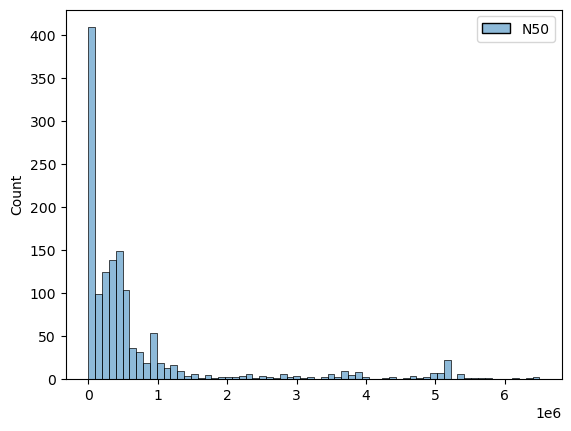

Genome GCA_001623385.2_ASM162338v2_genomic did not pass the Total_length_(>=_1000_bp) threshold with total length equal to 687137
Genome GCA_004143925.1_ASM414392v1_genomic did not pass the Total_length_(>=_1000_bp) threshold with total length equal to 6544051
Genome GCA_004143935.1_ASM414393v1_genomic did not pass the Total_length_(>=_1000_bp) threshold with total length equal to 3104539
Genome GCA_004144025.1_ASM414402v1_genomic did not pass the Total_length_(>=_1000_bp) threshold with total length equal to 5257628
Genome GCA_004144035.1_ASM414403v1_genomic did not pass the Total_length_(>=_1000_bp) threshold with total length equal to 301010
Genome GCA_004144045.1_ASM414404v1_genomic did not pass the Total_length_(>=_1000_bp) threshold with total length equal to 294965
Genome GCA_004144085.1_ASM414408v1_genomic did not pass the Total_length_(>=_1000_bp) threshold with total length equal to 4514992
Genome GCA_004144095.1_ASM414409v1_genomic did not pass the Total_length_(>=_1000_bp) 

/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

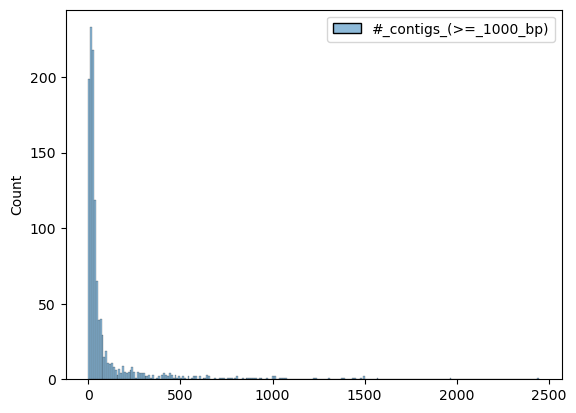

Total_length_(>=_1000_bp)
[ 1081583  1116179  1196064 ... 10201721 10442526 10741251]


/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

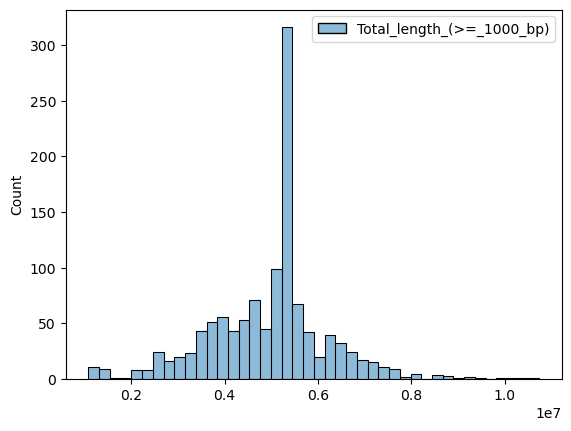

Largest_contig


/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[  18925   19949   22400 ... 6332373 6427864 6500345]


/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

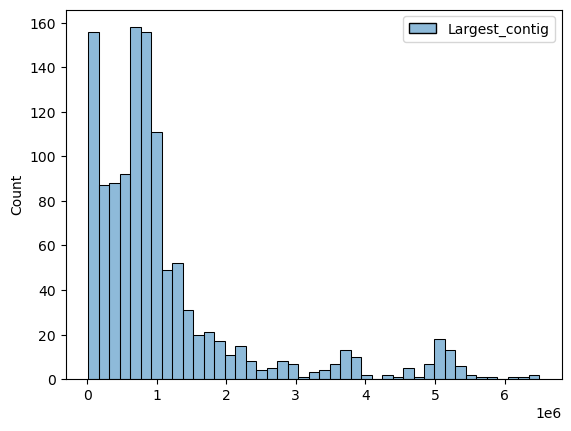

N50
[   5055    5082    5093 ... 6332373 6427864 6500345]


/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vtracann/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

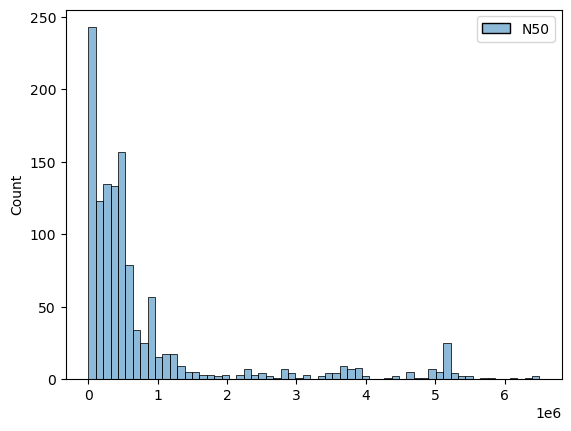

In [39]:
quast_report = pd.read_csv('/DATA_RAID2/vtracann/shared/db/isolates/global/unzipped/quast/report_edit.txt', sep='\t', index_col=0)
#sns.pairplot(quast_report)
#plt.savefig('/DATA_RAID2/vtracann/shared/db/isolates/figures/pairplot_assembly_quality.pdf')
#plt.show()
#plt.close()

print (list(quast_report.columns))
print (quast_report.loc[:, ['#_contigs_(>=_1000_bp)', 'Total_length_(>=_1000_bp)', 'Largest_contig', 'N50']])

#top10
print ('#_contigs_(>=_1000_bp)')
print (np.sort(quast_report.loc[:, ['#_contigs_(>=_1000_bp)']].values.flatten()))
sns.histplot(quast_report.loc[:, ['#_contigs_(>=_1000_bp)']])
plt.show()
plt.close()

print ('Total_length_(>=_1000_bp)')
print (np.sort(quast_report.loc[:, ['Total_length_(>=_1000_bp)']].values.flatten()))
sns.histplot(quast_report.loc[:, ['Total_length_(>=_1000_bp)']])
plt.show()
plt.close()

print ('Largest_contig')
print (np.sort(quast_report.loc[:, ['Largest_contig']].values.flatten()))
sns.histplot(quast_report.loc[:, ['Largest_contig']])
plt.show()
plt.close()

print('N50')
print (np.sort(quast_report.loc[:, ['N50']].values.flatten()))
sns.histplot(quast_report.loc[:, ['N50']])
plt.show()
plt.close()

#sns.pairplot(quast_report.loc[:, ['#_contigs_(>=_1000_bp)', 'Total_length_(>=_1000_bp)', 'Largest_contig', 'N50']])
#plt.savefig('/DATA_RAID2/vtracann/shared/db/isolates/figures/pairplot_assembly_quality_small.pdf')
#plt.show()
#plt.close()

#Check how many assemblies pass the quality requirements - must pass1 and at least one between 2 and 3: 
#1. at least 800Kb in Length 
#2. N50>5Kb 
#3. 800Kb in total assembly size for contigs above 5Kb

good_genomes = []
bad_genomes = []

for genome in quast_report.index:
    if quast_report.loc[genome, 'Total_length_(>=_1000_bp)'] >= 800000 and quast_report.loc[genome, 'N50'] > 5000:
        #pass first filter
        if quast_report.loc[genome, 'N50'] >= 50000:
            #pass second filter
            good_genomes.append(genome)
            
        elif quast_report.loc[genome, 'Total_length_(>=_5000_bp)'] >= 800000:
            #pass third filter
            good_genomes.append(genome)
        else:
                print ('Genome {} did not pass the second threshold with N50 equal to {} and assembly size for contigs above 5Kb equal to {}'.format(genome, quast_report.loc[genome, 'N50'], quast_report.loc[genome, 'Total_length_(>=_5000_bp)']))
    else:
        print ('Genome {} did not pass the Total_length_(>=_1000_bp) threshold with total length equal to {}'.format(genome, quast_report.loc[genome, 'Total_length_(>=_1000_bp)']))
        bad_genomes.append(genome)

print (len(good_genomes))
print (len(bad_genomes))

print ('#_contigs_(>=_1000_bp)')
print (np.sort(quast_report.loc[good_genomes, ['#_contigs_(>=_1000_bp)']].values.flatten()))
sns.histplot(quast_report.loc[good_genomes, ['#_contigs_(>=_1000_bp)']])
plt.show()
plt.close()

print ('Total_length_(>=_1000_bp)')
print (np.sort(quast_report.loc[good_genomes, ['Total_length_(>=_1000_bp)']].values.flatten()))
sns.histplot(quast_report.loc[good_genomes, ['Total_length_(>=_1000_bp)']])
plt.show()
plt.close()

print ('Largest_contig')
print (np.sort(quast_report.loc[good_genomes, ['Largest_contig']].values.flatten()))
sns.histplot(quast_report.loc[good_genomes, ['Largest_contig']])
plt.show()
plt.close()

print('N50')
print (np.sort(quast_report.loc[good_genomes, ['N50']].values.flatten()))
sns.histplot(quast_report.loc[good_genomes, ['N50']])
plt.show()
plt.close()


In [40]:
leaf = 'L68 L90 L129 L70 L177 L160 L61 L416 L182 L49 L187 L233 L288 L41 L82 L5 L242 L231 L357 L2 L26'.split(' ')
leaf = [x.replace('L', 'Leaf') for x in leaf]
print (leaf)


leaf_assemblies = [x for x in quast_report.index if x.rstrip('_genomic').split('_')[-1] in leaf]
leaf_assemblies
print (len(leaf_assemblies))
print (len(leaf))

#print ([x for x in good_genomes if 'Leaf' in x])
found = [2, 5, 61, 68, 231, 70, 242, 41, 82, 288, 129, 357, 187, 160, 416, 49, 233, 90]
found = ['Leaf{}'.format(x) for x in found]

not_found = [x for x in leaf if x not in found]
print (not_found)
print (quast_report.index)


['Leaf68', 'Leaf90', 'Leaf129', 'Leaf70', 'Leaf177', 'Leaf160', 'Leaf61', 'Leaf416', 'Leaf182', 'Leaf49', 'Leaf187', 'Leaf233', 'Leaf288', 'Leaf41', 'Leaf82', 'Leaf5', 'Leaf242', 'Leaf231', 'Leaf357', 'Leaf2', 'Leaf26']
21
21
['Leaf177', 'Leaf182', 'Leaf26']
Index(['GCA_000179935.1_ASM17993v1_genomic',
       'GCA_000179955.1_ASM17995v1_genomic',
       'GCA_000179975.1_ASM17997v1_genomic',
       'GCA_000179995.1_ASM17999v1_genomic', 'GCA_001422265.1_Leaf90_genomic',
       'GCA_001422305.1_Leaf92_genomic', 'GCA_001422565.1_Leaf50_genomic',
       'GCA_001422935.1_Leaf119_genomic', 'GCA_001423025.1_Leaf122_genomic',
       'GCA_001423385.1_Leaf121_genomic',
       ...
       'GCF_019784205.1_ASM1978420v1_genomic', 'GCF_019784225.1_ASM1978422v1',
       'GCF_019784225.1_ASM1978422v1_genomic', 'GCF_024205925.1_ASM2420592v1',
       'GCF_900149295.1_V.spartinae_CECT9026T_Velvet_Prokka',
       'GCF_900164545.1_16780_8_80', 'GCF_902829415.1_ASM90282941v1',
       'Leaf177', 'Leaf182', 'Le

In [41]:
df = pd.read_csv('/DATA_RAID2/vtracann/shared/db/isolates/global/unzipped/pd_complete_collection_distance.tsv',sep='\t', index_col=0)
df = df.loc[df.index.dropna(), df.index.dropna()]

print ([x for x in df.index if 'Leaf' in x.split('_')[-1].split('.')[0]])

not_found_index = [x for x in df.index if x.split('_')[-1].split('.') in not_found]
print (not_found_index)

['GCF_001421155.1_Leaf5.fna', 'GCF_001421165.1_Leaf8.fna', 'GCF_001421235.1_Leaf202.fna', 'GCF_001421245.1_Leaf10.fna', 'GCF_001421275.1_Leaf203.fna', 'GCF_001421285.1_Leaf11.fna', 'GCF_001421325.1_Leaf2.fna', 'GCF_001421355.1_Leaf9.fna', 'GCF_001421405.1_Leaf16.fna', 'GCF_001421415.1_Leaf208.fna', 'GCF_001421425.1_Leaf15.fna', 'GCF_001421435.1_Leaf201.fna', 'GCF_001421485.1_Leaf210.fna', 'GCF_001421505.1_Leaf17.fna', 'GCF_001421515.1_Leaf216.fna', 'GCF_001421535.1_Leaf20.fna', 'GCF_001421565.1_Leaf222.fna', 'GCF_001421585.1_Leaf23.fna', 'GCF_001421605.1_Leaf24.fna', 'GCF_001421625.1_Leaf226.fna', 'GCF_001421705.1_Leaf220.fna', 'GCF_001421715.1_Leaf22.fna', 'GCF_001421745.1_Leaf230.fna', 'GCF_001421765.1_Leaf32.fna', 'GCF_001421785.1_Leaf33.fna', 'GCF_001421805.1_Leaf34.fna', 'GCF_001421825.1_Leaf38.fna', 'GCF_001421845.1_Leaf42.fna', 'GCF_001421865.1_Leaf44.fna', 'GCF_001421885.1_Leaf48.fna', 'GCF_001421905.1_Leaf61.fna', 'GCF_001421915.1_Leaf62.fna', 'GCF_001421945.1_Leaf64.fna', 'GC